In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.analysis import *
from src.data import FTRC_Data

import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import battery failure data bank
data = FTRC_Data()

# Remove non-commercial cells, 'test' cells, and cells with less than 10 measurements from the data set
cells_to_remove = [
    'Soteria 18650 (AL)',
    'Soteria 18650 (ALCU)',
    'Soteria 18650 (CU)',
    'Soteria 18650 (DW)',
    'Soteria 18650 (ALDW)',
    'Soteria 18650 (ALCUDW)',
    'Soteria 18650 (Control)',
    'Saft D-Cell-VES16',
    'MOLiCEL 18650-J',
    'MOLiCEL 18650-M35A',
    'MOLiCEL 18650-P28A',
    'MOLiCEL 18650-Test Cell',
    'MOLiCEL 18650-Test Cell (DW-Gold)',
    'MOLiCEL 18650-Test Cell (DW-Silver)',
    'LG 18650-HG2',
    'LG 18650-M36',
    'LG 18650-Test Cell (NBV-220)',
    'LG 18650-Test Cell (NBV-250)',
    'Panasonic 18650-BE',
    'Samsung 18650-26J',
    'Samsung 18650-30Q',
    'Sony 18650-VTC6',
    ]
for cell in cells_to_remove:
    data.remove(cell)

df = data.df

cell_descriptions_plot_labels = {
    "KULR 21700-K500": "KULR\n21700-K500",
    "KULR 18650-K330": "KULR\n18650-K330",
    "LG 21700-M50 (BV)": "LG\n21700-M50",
    "LG 18650-Test Cell (BV-220)": "LG 18650\n(BV-220)",
    "LG 18650-MJ1 (Korean)": "LG\n18650-MJ1",
    "LG 18650-Test Cell (BV-250)": "LG 18650\n(BV-250)",
    "Sanyo 18650-A": "Sanyo\n18650-A",
    "Sony 18650-VC7": "Sony\n18650-VC7",
}
df.loc[:, "Cell-Description (NEW)"] = df["Cell-Description"].apply(lambda x: cell_descriptions_plot_labels[x])

cell_descriptions_clean = {
    "KULR 21700-K500": "KULR 21700-K500",
    "KULR 18650-K330": "KULR 18650-K330",
    "LG 21700-M50 (BV)": "LG 21700-M50",
    "LG 18650-Test Cell (BV-220)": "LG 18650 (BV-220)",
    "LG 18650-MJ1 (Korean)": "LG 18650-MJ1",
    "LG 18650-Test Cell (BV-250)": "LG 18650 (BV-250)",
    "Sanyo 18650-A": "Sanyo 18650-A",
    "Sony 18650-VC7": "Sony 18650-VC7",
}
df.loc[:, "Cell-Description"] = df["Cell-Description"].apply(lambda x: cell_descriptions_clean[x])

df.loc[:, "Distribution"] = "Actual"

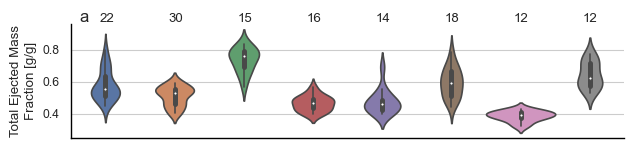

In [3]:
# figure 2 - data exploration violin plots
# ax 1: mass ejected g/g
# ax 2: normalized total heat output
# ax 3: positive heat
# ax 4: cell body heat
# ax 5: negative heat

# sns.set(rc={'figure.figsize': (40,3),'axes.labelsize': 5, 'ytick.labelsize': 5, 'axes.labelpad': 5,
#             'legend.fontsize':5, 'xtick.labelsize': 5, "figure.dpi":600, 'legend.title_fontsize':5})
sns.set_theme("paper")
sns.set_style("whitegrid", {'axes.edgecolor':"black"})

w = 6.5
h = 1.5
a = w/h
vio_width = 1
g = sns.catplot(
    data=df, x="Cell-Description (NEW)", y="Total Ejected Mass Fraction [g/g]",
    kind="violin", height=h, aspect=a, width=vio_width
)
g.set_ylabels("Total Ejected Mass\nFraction [g/g]")
g.set_xticklabels("")
g.set_xlabels("")

value_counts = df["Cell-Description"].value_counts(sort=False).values
for i, value in enumerate(value_counts):
    g.figure.text(0.17 + i/9.42, 0.92, str(value))

x_text = 0.14
y_text = 0.92
g.figure.text(x_text, y_text, "a", fontsize=12)
plt.tight_layout()
plt.savefig("figures/fig_data_violins_a.tif")


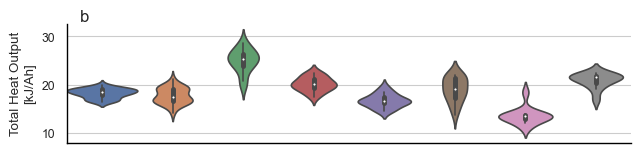

In [4]:
g = sns.catplot(
    data=df, x="Cell-Description (NEW)", y="Total Heat Output [kJ/A*h]",
    kind="violin", height=h, aspect=a, width=vio_width
)
g.set_ylabels("Total Heat Output\n[kJ/Ah]")
g.set_xticklabels("")
g.set_xlabels("")

g.figure.text(x_text-0.01, y_text, "b", fontsize=12)
plt.tight_layout()
plt.savefig("figures/fig_data_violins_b.tif")

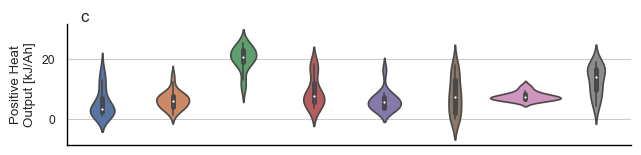

In [5]:
g = sns.catplot(
    data=df, x="Cell-Description (NEW)", y="Positive Heat Output [kJ/A*h]",
    kind="violin", height=h, aspect=a, width=vio_width
)
g.set_ylabels("Positive Heat\nOutput [kJ/Ah]")
g.set_xticklabels("")
g.set_xlabels("")

g.figure.text(x_text-0.01, y_text, "c", fontsize=12)
plt.tight_layout()
plt.savefig("figures/fig_data_violins_c.tif")

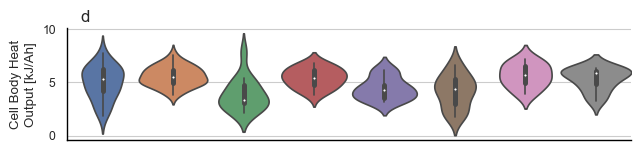

In [6]:
g = sns.catplot(
    data=df, x="Cell-Description (NEW)", y="Cell Body Heat Output [kJ/A*h]",
    kind="violin", height=h, aspect=a, width=vio_width
)
g.set_ylabels("Cell Body Heat\nOutput [kJ/Ah]")
g.set_xticklabels("")
g.set_xlabels("")

g.figure.text(x_text-0.01, y_text, "d", fontsize=12)
plt.tight_layout()
plt.savefig("figures/fig_data_violins_d.tif")

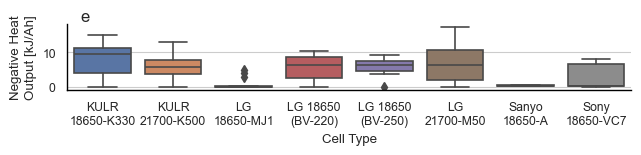

In [7]:
g = sns.catplot(
    data=df, x="Cell-Description (NEW)", y="Negative Heat Output [kJ/A*h]",
    kind="box", height=h, aspect=a,
)
g.set_ylabels("Negative Heat\nOutput [kJ/Ah]")
# g.set_xticklabels("")
g.set_xlabels("Cell Type")

g.figure.text(x_text-0.01, y_text, "e", fontsize=12)
plt.tight_layout()
plt.savefig("figures/fig_data_violins_e.tif")

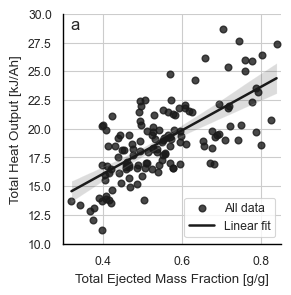

In [8]:
h = 3
w = 3
a = w/h
g = sns.lmplot(data=df,
            x="Total Ejected Mass Fraction [g/g]", y="Total Heat Output [kJ/A*h]",
            height=h, aspect=a, scatter_kws={'color':'k'}, line_kws={'color':'k'})
plt.ylim([10, 30])
plt.xlim([0.3, 0.85])
g.set_ylabels("Total Heat Output [kJ/Ah]")

kids = g.axes[0][0].get_children()
plt.legend([ kids[0], kids[1]], ["All data", "Linear fit"], loc='lower right')

g.figure.text(0.25, 0.9, "a", fontsize=12)

plt.savefig("figures/fig_data_linreg_a.tif")

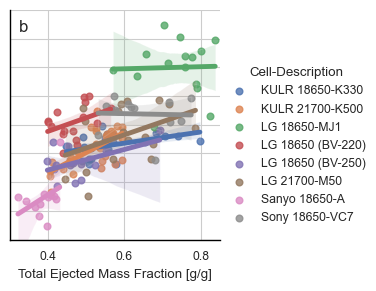

In [9]:
h = 3
w = 3
a = w/h
g = sns.lmplot(data=df,
            x="Total Ejected Mass Fraction [g/g]", y="Total Heat Output [kJ/A*h]",
            hue="Cell-Description", height=h, aspect=a, 
            line_kws={"linewidth":3.5, 'linestyle':'-'}
        )
plt.ylim([10, 30])
plt.xlim([0.3, 0.85])
g.set_ylabels("")
g.set_yticklabels("")

g.figure.text(0.21, 0.88, "b", fontsize=12)

plt.savefig("figures/fig_data_linreg_b.tif")

In [10]:
with open("results/dummy_errors.json", "rb") as file:
    d = json.load(file)
dummy_errors = read_errors_json(d)
dummy_errors.loc[:, "Cell-Description"] = dummy_errors["Cell-Description"].apply(lambda x: cell_descriptions_clean[x])

with open("results/svm_chain_errors.json", "rb") as file:
    d = json.load(file)
svm_chain_errors = read_errors_json(d)
svm_chain_errors.loc[:, "Cell-Description"] = svm_chain_errors["Cell-Description"].apply(lambda x: cell_descriptions_clean[x])

# with open("results/svm_multioutput_errors.json", "rb") as file:
#     d = json.load(file)
# svm_multioutput_errors = read_errors_json(d)

# with open("results/xgb_errors.json", "rb") as file:
#     d = json.load(file)
# xgb_errors = read_errors_json(d)

dummy_errors.size, svm_chain_errors.size #, svm_multioutput_errors.size

(447020, 447020)

In [11]:
with open("results/dummy_y_test_pred.json", "rb") as file:
    d = json.load(file)
dummy_y_test_pred = read_predictions_json(d)
dummy_y_test_pred.loc[:, "Cell-Description (NEW)"] = dummy_y_test_pred["Cell-Description"].apply(lambda x: cell_descriptions_plot_labels[x])
dummy_y_test_pred.loc[:, "Cell-Description"] = dummy_y_test_pred["Cell-Description"].apply(lambda x: cell_descriptions_clean[x])

with open("results/svm_chain_y_test_pred.json", "rb") as file:
    d = json.load(file)
svm_chain_y_test_pred = read_predictions_json(d)
svm_chain_y_test_pred.loc[:, "Cell-Description (NEW)"] = svm_chain_y_test_pred["Cell-Description"].apply(lambda x: cell_descriptions_plot_labels[x])
svm_chain_y_test_pred.loc[:, "Cell-Description"] = svm_chain_y_test_pred["Cell-Description"].apply(lambda x: cell_descriptions_clean[x])

# with open("results/svm_multioutput_y_test_pred.json", "rb") as file:
#     d = json.load(file)
# svm_multioutput_y_test_pred = read_predictions_json(d)
# svm_multioutput_y_test_pred.loc[:, "Cell-Description (NEW)"] = svm_multioutput_y_test_pred["Cell-Description"].apply(lambda x: cell_descriptions_plot_labels[x])
# svm_multioutput_y_test_pred.loc[:, "Cell-Description"] = svm_multioutput_y_test_pred["Cell-Description"].apply(lambda x: cell_descriptions_clean[x])

# with open("results/xgb_y_test_pred.json", "rb") as file:
#     d = json.load(file)
# xgb_y_test_pred = read_predictions_json(d)
# xgb_y_test_pred.loc[:, "Cell-Description (NEW)"] = xgb_y_test_pred["Cell-Description"].apply(lambda x: cell_descriptions_plot_labels[x])
# xgb_y_test_pred.loc[:, "Cell-Description"] = xgb_y_test_pred["Cell-Description"].apply(lambda x: cell_descriptions_clean[x])

dummy_y_test_pred.size, svm_chain_y_test_pred.size, #svm_multioutput_y_test_pred.size

(5772807, 5772807, 5772807)

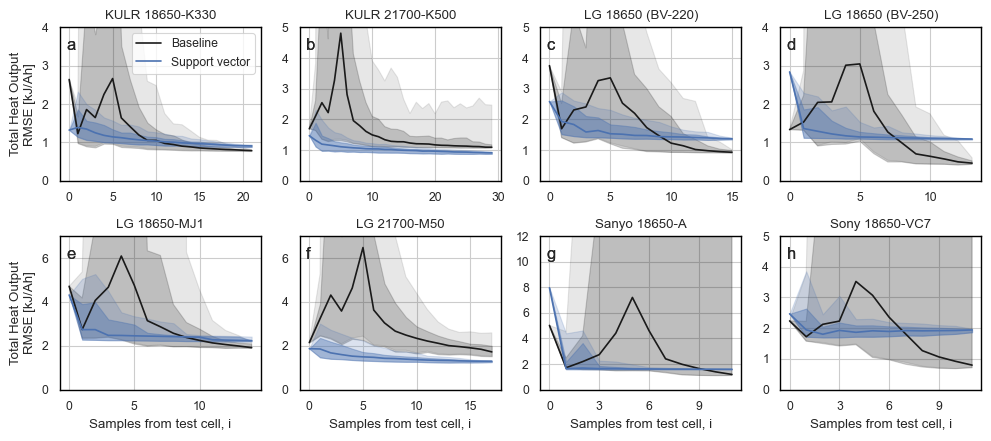

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(10,4.5))
axes = axes.ravel()
    
plot_errors(dummy_errors, axes=axes, color='k', label='Baseline', metric='rmse')
plot_errors(svm_chain_errors, axes=axes, color='b', label='Support vector', metric='rmse', y_upperlim = [4, 5, 5, 4, 7, 7, 12, 5])

plt.savefig("figures/fig_results_rmse.tif")

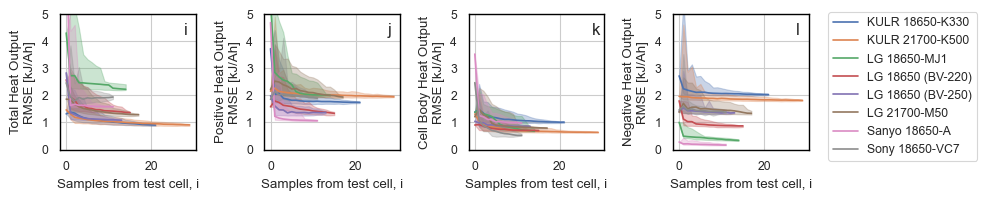

In [42]:
fig, axes = plt.subplots(1, 4, figsize=(10,2.1))
axes = axes.ravel()

plot_errors_singleaxis(svm_chain_errors, target="total", metric='rmse', ax=axes[0])
axes[0].legend().remove()
axes[0].set_ylim([0, 5])
axes[0].text(0.91, 0.85, 'i', fontsize=12, transform=axes[0].transAxes)
plot_errors_singleaxis(svm_chain_errors, target="positive", metric='rmse', ax=axes[1])
axes[1].legend().remove()
axes[1].set_ylim([0, 5])
axes[1].text(0.91, 0.85, 'j', fontsize=12, transform=axes[1].transAxes)
plot_errors_singleaxis(svm_chain_errors, target="body", metric='rmse', ax=axes[2])
axes[2].legend().remove()
axes[2].set_ylim([0, 5])
axes[2].text(0.91, 0.85, 'k', fontsize=12, transform=axes[2].transAxes)
plot_errors_singleaxis(svm_chain_errors, target="negative", metric='rmse', ax=axes[3])
axes[3].legend(bbox_to_anchor=(1.1, 1.06))
axes[3].set_ylim([0, 5])
axes[3].text(0.91, 0.85, 'l', fontsize=12, transform=axes[3].transAxes)

plt.tight_layout()
plt.savefig("figures/fig_results_rmse_fractional.tif")

Text(40.60625, 0.5, '')

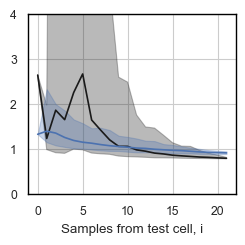

In [14]:
fig, ax = plt.subplots(1,1, figsize=(3,2.5))
plot_errors_singleaxis(dummy_errors[dummy_errors["Cell-Description"] == "KULR 18650-K330"], metric='rmse', ax=ax, color='k')
plot_errors_singleaxis(svm_chain_errors[svm_chain_errors["Cell-Description"] == "KULR 18650-K330"], metric='rmse', ax=ax)
plt.legend().remove()
ax.set_ylim([0,4])
ax.set_ylabel("")

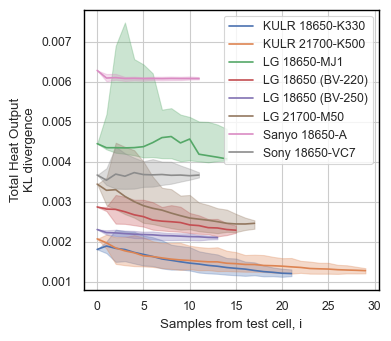

In [15]:
plot_errors_singleaxis(svm_chain_errors, metric='kl')
plt.savefig("figures/fig_results_kl.tif")

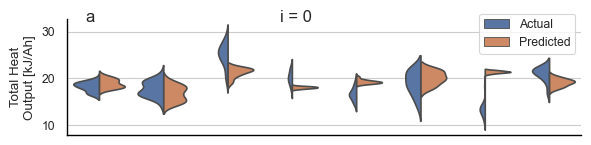

In [16]:
i_test = 0
d_pred = svm_chain_y_test_pred

d = d_pred[d_pred["i_test"] == i_test]
# no iters for i=0, just drop iter
d = d.drop(["i_test", "iter"], axis=1)
data_true = df[d.columns]
d = pd.concat((data_true, d)).reset_index(drop=True)

sns.set_theme("paper")
sns.set_style("whitegrid", {'axes.edgecolor':"black"})

w = 6
h = 1.5
fig, ax = plt.subplots(1, 1, figsize=(w, h))

g = sns.violinplot(
    data=d, x="Cell-Description (NEW)", y="Total Heat Output [kJ/A*h]", hue="Distribution",
    height=h, aspect=a, split=True, inner=None, legend=False, ax=ax
)
ax.set_ylabel("Total Heat\nOutput [kJ/Ah]")
ax.set_xticklabels("")
ax.set_xlabel("")
plt.legend(bbox_to_anchor=(1, 1.1))

sns.despine(fig)

x_text = 0.15
y_text = 0.85
g.figure.text(x_text, y_text, "a", fontsize=12)
g.figure.text(0.5, y_text, "i = 0", fontsize=12, horizontalalignment='center')

plt.tight_layout()
plt.savefig("figures/fig_results_violins_a.tif")

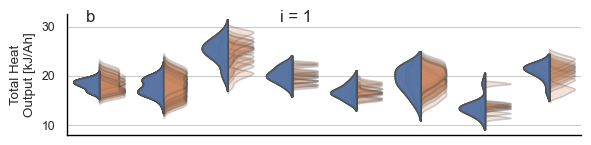

In [17]:
i_test = 1
d_pred = svm_chain_y_test_pred
d_pred = d_pred[d_pred["i_test"] == i_test]

sns.set_theme("paper")
sns.set_style("whitegrid", {'axes.edgecolor':"black"})

w = 6
h = 1.5
fig, ax = plt.subplots(1, 1, figsize=(w, h))

iters = np.unique(d_pred["iter"])
if i_test > 1:
    iters = iters[:20]

for iter in iters:
    d = d_pred[d_pred["iter"] == iter]
    d = d.drop(["i_test", "iter"], axis=1)
    data_true = df[d.columns]
    d = pd.concat((data_true, d)).reset_index(drop=True)
        
    g = sns.violinplot(
        data=d, x="Cell-Description (NEW)", y="Total Heat Output [kJ/A*h]", hue="Distribution",
        height=h, aspect=a, split=True, inner=None, legend=None, ax=ax
        )
    
    for violin in g.collections:
        violin.set_alpha(0.25)

ax.legend().remove()
ax.set_ylabel("Total Heat\nOutput [kJ/Ah]")
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_xticklabels("")
ax.set_xlabel("")

sns.despine(fig)

x_text = 0.15
y_text = 0.85
g.figure.text(x_text, y_text, "b", fontsize=12)
g.figure.text(0.5, y_text, "i = 1", fontsize=12, horizontalalignment='center')

plt.tight_layout()
plt.savefig("figures/fig_results_violins_b.tif")

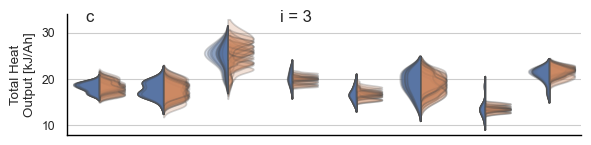

In [18]:
i_test = 3
d_pred = svm_chain_y_test_pred
d_pred = d_pred[d_pred["i_test"] == i_test]

sns.set_theme("paper")
sns.set_style("whitegrid", {'axes.edgecolor':"black"})

w = 6
h = 1.5
fig, ax = plt.subplots(1, 1, figsize=(w, h))

iters = np.unique(d_pred["iter"])
if i_test > 1:
    iters = iters[:20]

for iter in iters:
    d = d_pred[d_pred["iter"] == iter]
    d = d.drop(["i_test", "iter"], axis=1)
    data_true = df[d.columns]
    d = pd.concat((data_true, d)).reset_index(drop=True)

    g = sns.violinplot(
        data=d, x="Cell-Description (NEW)", y="Total Heat Output [kJ/A*h]", hue="Distribution",
        height=h, aspect=a, split=True, inner=None, legend=None, ax=ax
    )
    for violin in g.collections:
        violin.set_alpha(0.25)

ax.legend().remove()
ax.set_ylabel("Total Heat\nOutput [kJ/Ah]")
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
ax.set_xticklabels("")
ax.set_xlabel("")

sns.despine(fig)

x_text = 0.15
y_text = 0.85
g.figure.text(x_text, y_text, "c", fontsize=12)
g.figure.text(0.5, y_text, "i = 3", fontsize=12, horizontalalignment='center')

plt.tight_layout()
plt.savefig("figures/fig_results_violins_c.tif")

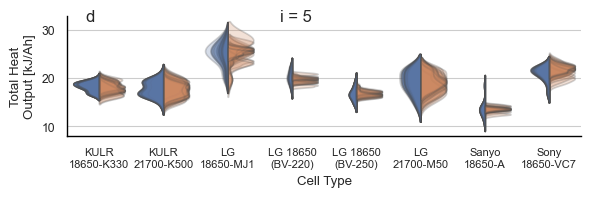

In [19]:
i_test = 5
d_pred = svm_chain_y_test_pred
d_pred = d_pred[d_pred["i_test"] == i_test]

sns.set_theme("paper")
sns.set_style("whitegrid", {'axes.edgecolor':"black"})

w = 6
h = 2
fig, ax = plt.subplots(1, 1, figsize=(w, h))

iters = np.unique(d_pred["iter"])
if i_test > 1:
    iters = iters[:20]

for iter in iters:
    d = d_pred[d_pred["iter"] == iter]
    d = d.drop(["i_test", "iter"], axis=1)
    data_true = df[d.columns]
    d = pd.concat((data_true, d)).reset_index(drop=True)

    g = sns.violinplot(
        data=d, x="Cell-Description (NEW)", y="Total Heat Output [kJ/A*h]", hue="Distribution",
        height=h, aspect=a, split=True, inner=None, legend=None, ax=ax
    )
    for violin in g.collections:
        violin.set_alpha(0.25)

ax.legend().remove()
ax.set_ylabel("Total Heat\nOutput [kJ/Ah]")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
# ax.set_xticklabels("")
ax.set_xlabel("Cell Type")

sns.despine(fig)

x_text = 0.15
y_text = 0.9
g.figure.text(x_text, y_text, "d", fontsize=12)
g.figure.text(0.5, y_text, "i = 5", fontsize=12, horizontalalignment='center')

plt.tight_layout()
plt.savefig("figures/fig_results_violins_d.tif")

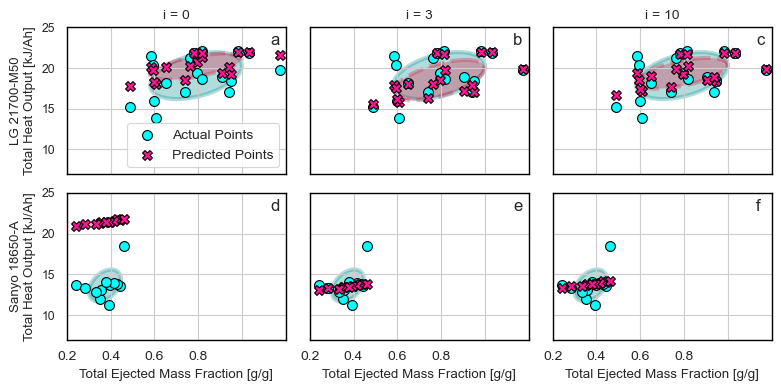

In [20]:
# ["LG 21700-M50", "Sanyo 18650-A"] ["KULR 21700-K500", "Sanyo 18650-A"]
cells = ["LG 21700-M50", "Sanyo 18650-A"]
i_tests = [0,3,10]
iter = 0 # no iter for zero-shot
d_pred = svm_chain_y_test_pred

fig, axes = plt.subplots(2, 3, figsize=(8,4))
axes = axes.ravel()

ax_labels = ['a','b','c','d','e','f']

i = 0
for cell in cells:
    for i_test in i_tests:
        d = d_pred[d_pred["i_test"] == i_test]
        if i_test > 0:
            d = d[d["iter"] == iter]
        d = d[d["Cell-Description"] == cell]
        d = d.drop(["i_test", "iter"], axis=1).reset_index(drop=True)
        columns = ["Total Ejected Mass Fraction [g/g]", "Total Heat Output [kJ/A*h]"]
        data_true = df[df["Cell-Description"] == cell]
        data_true = data_true[columns].reset_index(drop=True)
        d.loc[:, "Total Ejected Mass Fraction [g/g]"] = data_true["Total Ejected Mass Fraction [g/g]"]
        d = d[columns]

        mul_mahalanobis_plot(data_true.to_numpy(), d.to_numpy(), ax=axes[i], sz=50, ellipse_n_prctiles=2)

        axes[i].set_xlim([0.3, 0.8])
        axes[i].set_ylim([7, 25])

        if i == 0:
            axes[i].legend(fontsize=10, loc='lower right')
            axes[i].set_ylabel(cell + "\nTotal Heat Output [kJ/Ah]")
        elif i ==3:
            axes[i].set_ylabel(cell + "\nTotal Heat Output [kJ/Ah]")
        elif i != 3:
            axes[i].set_yticklabels("")

        if i > 2:
            axes[i].set_xticklabels(axes[i].get_xticklabels(), fontsize=10)
            axes[i].set_xlabel("Total Ejected Mass Fraction [g/g]")
        else:
            axes[i].set_xticklabels("")
        
        if i < 3:
            axes[i].set_title("i = " + str(i_tests[i]), fontsize=10)

        axes[i].text(0.93, 0.88, ax_labels[i], fontsize=12, transform=axes[i].transAxes)
            
        i += 1


plt.tight_layout()
plt.savefig("figures/fig_results_mahalanobis.tif")

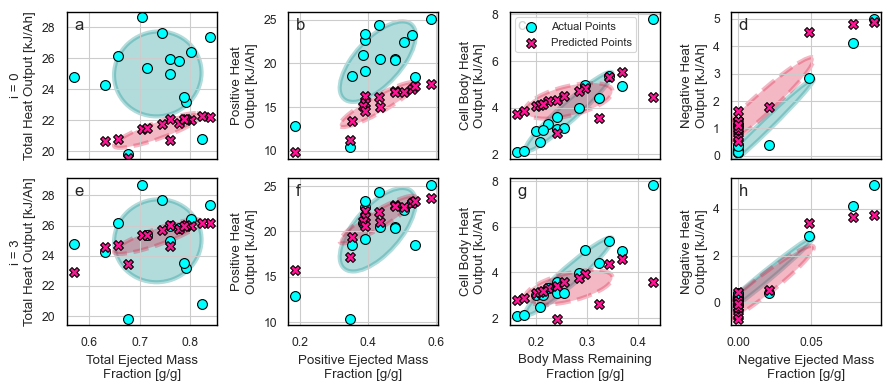

In [21]:
# "LG 18650-MJ1" "KULR 21700-K500" "LG 18650 (BV-220)"
cell = "LG 18650-MJ1"
targets = ["Total Heat Output [kJ/A*h]", "Positive Heat Output [kJ/A*h]", "Cell Body Heat Output [kJ/A*h]", "Negative Heat Output [kJ/A*h]"]
target_labels = ["Total Heat Output [kJ/Ah]", "Positive Heat\nOutput [kJ/Ah]", "Cell Body Heat\nOutput [kJ/Ah]", "Negative Heat\nOutput [kJ/Ah]"]
features = ['Total Ejected Mass Fraction [g/g]', 'Positive Ejected Mass Fraction [g/g]', 'Body Mass Remaining Fraction [g/g]', 'Negative Ejected Mass Fraction [g/g]']
feature_labels = ['Total Ejected Mass\nFraction [g/g]', 'Positive Ejected Mass\nFraction [g/g]', 'Body Mass Remaining\nFraction [g/g]', 'Negative Ejected Mass\nFraction [g/g]']
i_tests = [0,3]
iter = 0 # no iter for zero-shot
d_pred = svm_chain_y_test_pred

fig, axes = plt.subplots(2, 4, figsize=(9,4))
axes = axes.ravel()

ax_labels = ['a','b','c','d','e','f','g','h','i','j','k','l']

i = 0
for i_test in i_tests:
    for target, feature, target_label, feature_label in zip(targets, features, target_labels, feature_labels):
        d = d_pred[d_pred["i_test"] == i_test]
        if i_test > 0:
            d = d[d["iter"] == iter]
        d = d[d["Cell-Description"] == cell]
        d = d.drop(["i_test", "iter"], axis=1).reset_index(drop=True)
        columns = [feature, target]
        data_true = df[df["Cell-Description"] == cell]
        data_true = data_true[columns].reset_index(drop=True)
        d.loc[:, feature] = data_true[feature]
        d = d[columns]

        mul_mahalanobis_plot(data_true.to_numpy(), d.to_numpy(), ax=axes[i], sz=50, ellipse_n_prctiles=2)

        # axes[i].set_xlim([0.3, 0.8])
        # axes[i].set_ylim([7, 25])

        if i == 0:
            axes[i].set_ylabel("i = " + str(i_test) + "\n" + target_label)
        elif i == 4:
            axes[i].set_ylabel("i = " + str(i_test) + "\n" + target_label)
        else:
            axes[i].set_ylabel(target_label)

        if i > 3:
            axes[i].set_xlabel(feature_label)
        else:
            axes[i].set_xticklabels("")

        if i == 2:
            axes[i].legend(fontsize=8, loc='best')

        if i == 0:
            axes[i].set_ylim([19.5, 29])
        axes[i].text(0.05, 0.88, ax_labels[i], fontsize=12, transform=axes[i].transAxes)
            
        i += 1


plt.tight_layout()
plt.savefig("figures/fig_results_mahalanobis_fractional.tif")